In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("Data.csv")
df.head()

,Team_id,Team,Season,PP%,PK%,S%,SV%,GF/60,GA/60,SF/60,SA/60,FF/60,FA/60,CF/60,CA/60,xGF/60,xGA/60,Playoffs,PTS/82
0,0,Anaheim Ducks,18-19,16.98,79.70,8.6,0.909,2.09,2.38,27.58,31.59,39.75,45.56,53.32,60.47,2.26,2.77,0,80.0
1,1,Arizona Coyotes,18-19,16.28,84.96,8.3,0.913,2.05,2.41,29.99,30.49,41.65,42.98,56.24,58.93,2.35,2.41,0,86.0
2,2,Boston Bruins*,18-19,25.90,79.92,9.6,0.912,2.47,1.94,32.21,27.61,44.66,38.16,58.47,50.91,2.45,2.17,1,107.0
3,3,Buffalo Sabres,18-19,19.49,80.93,8.2,0.901,2.28,2.86,31.50,32.97,42.96,44.22,55.26,56.75,2.24,2.50,0,76.0
4,4,Calgary Flames*,18-19,19.27,79.67,10.9,0.903,2.88,2.35,31.91,27.80,44.75,39.15,60.70,51.73,2.67,2.34,1,107.0


In [3]:
X = df[['PP%','PK%','SV%','S%','CF/60','CA/60','xGF/60','xGA/60']]
y = df[['PTS/82']]

In [4]:
X.describe()

,PP%,PK%,SV%,S%,CF/60,CA/60,xGF/60,xGA/60
count,362.000000,362.000000,362.000000,362.000000,362.000000,362.000000,362.000000,362.000000
mean,18.542928,81.407818,0.908771,9.124309,54.454365,54.452956,2.293619,2.293895
std,2.938600,2.989266,0.008578,0.863841,4.378835,4.538903,0.222383,0.233183
min,10.040000,72.730000,0.885000,6.900000,39.140000,39.300000,1.690000,1.750000
25%,16.530000,79.702500,0.903000,8.500000,51.485000,51.470000,2.132500,2.120000
50%,18.345000,81.455000,0.909000,9.100000,54.815000,54.820000,2.295000,2.310000
75%,20.312500,83.395000,0.914000,9.600000,57.555000,57.480000,2.430000,2.447500
max,28.240000,89.580000,0.933000,12.200000,65.780000,68.530000,3.070000,2.880000


AxesSubplot(0.125,0.125;0.775x0.755)


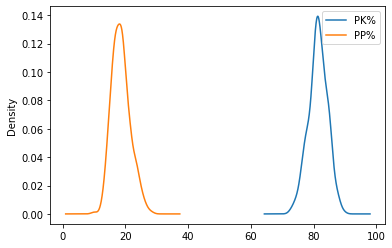

In [5]:
print(df[['PK%','PP%']].plot.density())

AxesSubplot(0.125,0.125;0.775x0.755)


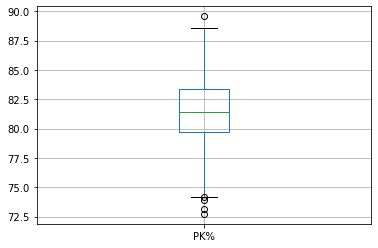

In [6]:
print(df.boxplot(column=['PK%']))

AxesSubplot(0.125,0.125;0.775x0.755)


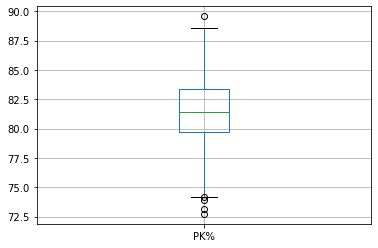

In [7]:
print(df.boxplot(column=['PK%']))

AxesSubplot(0.125,0.125;0.775x0.755)


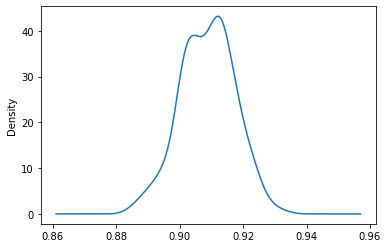

In [8]:
print(df['SV%'].plot.density())

AxesSubplot(0.125,0.125;0.775x0.755)


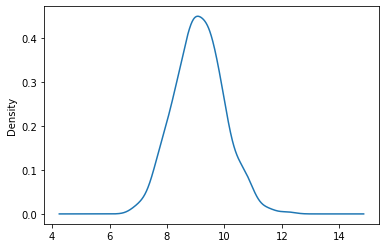

In [9]:
print(df['S%'].plot.density())

AxesSubplot(0.125,0.125;0.775x0.755)


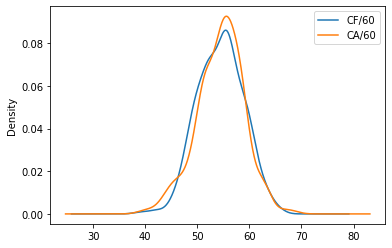

In [10]:
print(df[['CF/60','CA/60']].plot.density())

AxesSubplot(0.125,0.125;0.775x0.755)


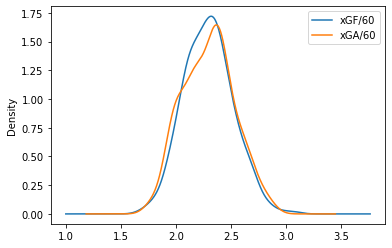

In [11]:
print(df[['xGF/60','xGA/60']].plot.density())

In [12]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1)

# Linear SVR

Poly SVR Never finishes running on machine

In [13]:
from sklearn import svm
from sklearn.svm import SVR

In [14]:
model = svm.SVR()
model = SVR(kernel='linear')
model.fit(X_train, y_train.to_numpy().ravel())

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
    gamma='auto_deprecated', kernel='linear', max_iter=-1, shrinking=True,
    tol=0.001, verbose=False)

In [15]:
y_pred_class = model.predict(X_test)
print(model.score(X_test, y_test))

0.7112617548122876


# Linear Regression

In [71]:
from sklearn.linear_model import LinearRegression
regression_model = LinearRegression()
regression_model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [72]:
regression_model.score(X_test, y_test)

0.8589112804338033

# Random Forest (the best)

In [16]:
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
from sklearn.metrics import accuracy_score

In [17]:
from sklearn.ensemble import RandomForestRegressor 
regressor = RandomForestRegressor(n_estimators = 1000, random_state = 0) 
regressor.fit(X, y.values.ravel())
y_pred_class = regressor.predict(X_test)

In [18]:
y_pred_class = regressor.predict(X_test)

In [19]:
from sklearn.metrics import r2_score

In [20]:
print(regressor.score(X_test, y_test))

0.9707158487151799


In [21]:
# This means that in my model, 97.07% of the variability in Y can be explained using X

In [22]:
from sklearn.metrics import mean_squared_error

In [23]:
y_predict = regressor.predict(X_test)

regression_model_mse = mean_squared_error(y_test,y_predict)

print(regression_model_mse)

6.190038452911665


In [24]:
import math

print(math.sqrt(regression_model_mse))

2.4879787886780034


# Current Standings Predictions as of December 5th 2019

In [25]:
curr = pd.read_csv("Current Data.csv")
curr.head()

,Name,Team,Season,GP,TOI,GF%,SF%,FF%,CF%,xGF%,...,S±/60,F±/60,C±/60,xG±/60,PTS,PTS%,PP%,PK%,S%,SV%
0,Ducks,ANA,19-20,28,1341.82,50.29,47.55,46.84,47.39,48.38,...,-2.87,-5.39,-5.85,-0.15,28,0.500,11.27,77.17,9.3,0.907
1,Coyotes,ARI,19-20,29,1403.72,55.33,49.01,48.04,48.00,49.27,...,-1.19,-3.27,-4.46,-0.06,36,0.621,19.28,80.72,9.0,0.929
2,Bruins,BOS,19-20,28,1346.47,61.09,50.84,50.83,51.30,49.09,...,1.01,1.36,2.80,-0.08,45,0.804,30.86,84.88,11.5,0.931
3,Sabres,BUF,19-20,28,1344.40,55.17,49.61,49.65,49.84,48.19,...,-0.47,-0.58,-0.34,-0.16,31,0.554,18.60,74.71,9.6,0.910
4,Hurricanes,CAR,19-20,28,1326.00,50.02,54.37,54.86,55.20,55.74,...,5.26,8.15,11.50,0.57,33,0.589,20.69,84.69,9.3,0.903


In [26]:
curr['PTS/82'] = curr['PTS']/(curr['GP']*2)*2*82
currX = curr[['PP%','PK%','SV%','S%','CF/60','CA/60','xGF/60','xGA/60']]

In [27]:
curr_predict = regressor.predict(currX)
current_predictions = pd.concat([curr['Name'],pd.DataFrame(curr_predict,columns=['Predicted_Points']),curr['PTS/82']], axis=1)
current_predictions.rename(columns={"PTS/82": "Points Pace"})
current_predictions.sort_values(by=['Predicted_Points'],ascending=False)

,Name,Predicted_Points,PTS/82
30,Capitals,114.296292,128.466667
2,Bruins,112.263375,131.785714
27,Canucks,106.800583,90.482759
8,Avalanche,106.780500,109.333333
24,Blues,105.301583,114.800000
4,Hurricanes,102.882500,96.642857
21,Flyers,102.189042,108.357143
22,Penguins,101.901833,99.571429
18,Islanders,101.309083,119.846154
25,Lightning,99.530208,95.120000


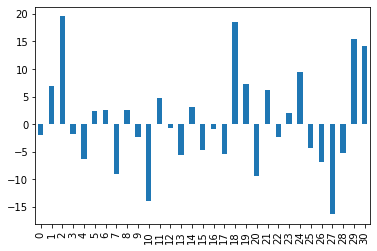

In [28]:
current_predictions['Difference'] = current_predictions['PTS/82']-current_predictions['Predicted_Points']
ax = current_predictions['Difference'].plot.bar()

# Analyizing Predictions

In [29]:
points = df['PTS/82']
predict = regressor.predict(X)
predictions = pd.concat([df['Team'],df['Season'],pd.DataFrame(predict,columns=['Predicted_Points']),points], axis=1)

Most over acheiving teams compared to their predicted points

In [30]:
predictions['difference'] = predictions['Predicted_Points']-predictions['PTS/82']
predictions = pd.concat([predictions,df['Playoffs']],axis=1)
predictions.sort_values(by=['difference']).head(10)

,Team,Season,Predicted_Points,PTS/82,difference,Playoffs
187,Chicago Blackhawks*,12-13,124.055250,131.541667,-7.486417,1
29,Washington Capitals*,18-19,97.705208,104.000000,-6.294792,1
326,San Jose Sharks*,09-10,111.089750,117.000000,-5.910250,1
206,St. Louis Blues*,12-13,96.860000,102.500000,-5.640000,1
342,Detroit Red Wings*,08-09,109.614125,115.000000,-5.385875,1
356,San Jose Sharks*,08-09,102.844875,108.000000,-5.155125,1
182,Anaheim Ducks*,12-13,107.656917,112.750000,-5.093083,1
204,Pittsburgh Penguins*,12-13,118.063625,123.000000,-4.936375,1
312,Detroit Red Wings*,09-10,107.067167,112.000000,-4.932833,1
140,New York Islanders*,14-15,96.127625,101.000000,-4.872375,1


Most underachieving teams compared to their predicted points

In [31]:
predictions.sort_values(by=['difference'],ascending=False).head(10)

,Team,Season,Predicted_Points,PTS/82,difference,Playoffs
154,Buffalo Sabres,13-14,62.042292,52.000000,10.042292,0
254,Florida Panthers,11-12,80.240542,72.000000,8.240542,0
69,Colorado Avalanche,16-17,55.699583,48.000000,7.699583,0
358,Tampa Bay Lightning,08-09,77.073292,71.000000,6.073292,0
127,Carolina Hurricanes,14-15,76.047417,71.000000,5.047417,0
118,Toronto Maple Leafs,15-16,74.018542,69.000000,5.018542,0
192,Edmonton Oilers,12-13,81.835958,76.875000,4.960958,0
79,New Jersey Devils,16-17,74.897958,70.000000,4.897958,0
207,Tampa Bay Lightning,12-13,73.193125,68.333333,4.859792,0
222,Edmonton Oilers,11-12,78.838917,74.000000,4.838917,0


Worst predicted teams

In [32]:
predictions.sort_values(by=['Predicted_Points']).head(10)

,Team,Season,Predicted_Points,PTS/82,difference,Playoffs
69,Colorado Avalanche,16-17,55.699583,48.0,7.699583,0
125,Buffalo Sabres,14-15,57.924750,54.0,3.924750,0
123,Arizona Coyotes,14-15,60.163917,56.0,4.163917,0
154,Buffalo Sabres,13-14,62.042292,52.0,10.042292,0
193,Florida Panthers,12-13,63.056375,61.5,1.556375,0
34,Buffalo Sabres,17-18,63.105333,62.0,1.105333,0
320,New York Islanders,09-10,63.561708,61.0,2.561708,0
133,Edmonton Oilers,14-15,63.833208,62.0,1.833208,0
283,Edmonton Oilers,09-10,64.162708,62.0,2.162708,0
253,Edmonton Oilers,11-12,65.023958,62.0,3.023958,0


Best predicted teams

In [33]:
predictions.sort_values(by=['Predicted_Points'], ascending=False).head(10)

,Team,Season,Predicted_Points,PTS/82,difference,Playoffs
187,Chicago Blackhawks*,12-13,124.055250,131.541667,-7.486417,1
25,Tampa Bay Lightning*,18-19,123.435750,128.000000,-4.564250,1
204,Pittsburgh Penguins*,12-13,118.063625,123.000000,-4.936375,1
120,Washington Capitals*,15-16,117.303667,120.000000,-2.696333,1
301,Washington Capitals*,09-10,117.093625,121.000000,-3.906375,1
90,Washington Capitals*,16-17,116.686000,118.000000,-1.314000,1
153,Boston Bruins*,13-14,115.678667,117.000000,-1.321333,1
47,Nashville Predators*,17-18,114.887042,117.000000,-2.112958,1
270,Vancouver Canucks*,11-12,114.797625,117.000000,-2.202375,1
296,San Jose Sharks*,09-10,113.849542,113.000000,0.849542,1


Best teams that missed the playoffs

In [34]:
nonplayoff_teams = predictions.where(predictions['Playoffs']==0).dropna()
nonplayoff_teams.sort_values(by=['Predicted_Points'], ascending=False).head(10)

,Team,Season,Predicted_Points,PTS/82,difference,Playoffs
135,Los Angeles Kings,14-15,97.384625,95.0,2.384625,0.0
124,Boston Bruins,14-15,96.530833,96.0,0.530833,0.0
87,Tampa Bay Lightning,16-17,96.060375,94.0,2.060375,0.0
246,Calgary Flames,11-12,94.990958,94.0,0.990958,0.0
251,Dallas Stars,11-12,94.896542,95.0,-0.103458,0.0
15,Montreal Canadiens,18-19,94.792500,96.0,-1.207500,0.0
314,Florida Panthers,09-10,94.613958,93.0,1.613958,0.0
305,Buffalo Sabres,09-10,94.138250,91.0,3.138250,0.0
40,Dallas Stars,17-18,94.108250,92.0,2.108250,0.0
43,Florida Panthers,17-18,93.916583,96.0,-2.083417,0.0


Worst playoff teams

In [35]:
playoff_teams = predictions.where(predictions['Playoffs']==1).dropna()
playoff_teams.sort_values(by=['Predicted_Points']).head(10)

,Team,Season,Predicted_Points,PTS/82,difference,Playoffs
287,Montreal Canadiens*,09-10,88.188750,88.000000,0.188750,1.0
106,Minnesota Wild*,15-16,88.361542,87.000000,1.361542,1.0
223,Florida Panthers*,11-12,90.138500,94.000000,-3.861500,1.0
195,Minnesota Wild*,12-13,90.648417,93.958333,-3.309917,1.0
310,Columbus Blue Jackets*,09-10,90.998292,92.000000,-1.001708,1.0
240,Washington Capitals*,11-12,91.355000,92.000000,-0.645000,1.0
327,St. Louis Blues*,09-10,91.398083,92.000000,-0.601917,1.0
160,Dallas Stars*,13-14,91.515458,91.000000,0.515458,1.0
293,Philadelphia Flyers*,09-10,91.572125,88.000000,3.572125,1.0
292,Ottawa Senators*,09-10,91.973792,94.000000,-2.026208,1.0


In [36]:
predictions.describe()

,Predicted_Points,PTS/82,difference,Playoffs
count,362.000000,362.000000,362.000000,362.000000
mean,91.613435,91.593232,0.020202,0.530387
std,12.298314,13.810948,2.408689,0.499767
min,55.699583,48.000000,-7.486417,0.000000
25%,82.695062,82.000000,-1.467448,0.000000
50%,93.506021,93.958333,-0.082812,1.000000
75%,99.901760,101.000000,1.571781,1.000000
max,124.055250,131.541667,10.042292,1.000000


In [37]:
predictions['abs diff'] = abs(predictions['difference'])

In [38]:
predictions.sort_values(by=['abs diff'], ascending=False).head(10)

,Team,Season,Predicted_Points,PTS/82,difference,Playoffs,abs diff
154,Buffalo Sabres,13-14,62.042292,52.000000,10.042292,0,10.042292
254,Florida Panthers,11-12,80.240542,72.000000,8.240542,0,8.240542
69,Colorado Avalanche,16-17,55.699583,48.000000,7.699583,0,7.699583
187,Chicago Blackhawks*,12-13,124.055250,131.541667,-7.486417,1,7.486417
29,Washington Capitals*,18-19,97.705208,104.000000,-6.294792,1,6.294792
358,Tampa Bay Lightning,08-09,77.073292,71.000000,6.073292,0,6.073292
326,San Jose Sharks*,09-10,111.089750,117.000000,-5.910250,1,5.910250
206,St. Louis Blues*,12-13,96.860000,102.500000,-5.640000,1,5.640000
342,Detroit Red Wings*,08-09,109.614125,115.000000,-5.385875,1,5.385875
356,San Jose Sharks*,08-09,102.844875,108.000000,-5.155125,1,5.155125


In [39]:
predictions.mean()

Predicted_Points    91.613435
PTS/82              91.593232
difference           0.020202
Playoffs             0.530387
abs diff             1.862253
dtype: float64

# Feature Importance

In [40]:
features = X.columns
importances = regressor.feature_importances_

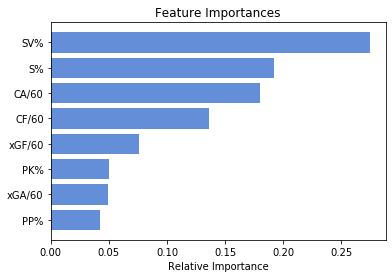

In [41]:
indices = np.argsort(importances)[-9:]  # top 10 features
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='#648FD8', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

# Save percentage testing

In [42]:
print(X['SV%'].describe())

count    362.000000
mean       0.908771
std        0.008578
min        0.885000
25%        0.903000
50%        0.909000
75%        0.914000
max        0.933000
Name: SV%, dtype: float64


In [43]:
nonplayoff_teams = predictions.where(predictions['Playoffs']==0)
nonplayoff_teams = pd.concat([nonplayoff_teams,X['SV%']],axis=1).dropna()
nonplayoff_teams.sort_values(by=['SV%'], ascending=False).head(50)
nonplayoff_teams.shape

(170, 8)

In [44]:
above_average_sv = nonplayoff_teams["SV%"]>0.908771
nonplayoff_teams_with_good_SV= nonplayoff_teams.where(above_average_sv)
nonplayoff_teams_with_good_SV.dropna().shape

(55, 8)

In [45]:
print(55/170)

0.3235294117647059


In [46]:
playoff_teams = predictions.where(predictions['Playoffs']==1)
playoff_teams = pd.concat([playoff_teams,X['SV%']],axis=1).dropna()
playoff_teams.sort_values(by=['SV%'], ascending=False).head(50)
playoff_teams.shape

(192, 8)

In [47]:
above_average_sv = playoff_teams["SV%"]>0.908771
playoff_teams_with_good_SV= playoff_teams.where(above_average_sv)
playoff_teams_with_good_SV.dropna().shape

(136, 8)

In [48]:
print(136/192)

0.7083333333333334


In [49]:
X.describe()

,PP%,PK%,SV%,S%,CF/60,CA/60,xGF/60,xGA/60
count,362.000000,362.000000,362.000000,362.000000,362.000000,362.000000,362.000000,362.000000
mean,18.542928,81.407818,0.908771,9.124309,54.454365,54.452956,2.293619,2.293895
std,2.938600,2.989266,0.008578,0.863841,4.378835,4.538903,0.222383,0.233183
min,10.040000,72.730000,0.885000,6.900000,39.140000,39.300000,1.690000,1.750000
25%,16.530000,79.702500,0.903000,8.500000,51.485000,51.470000,2.132500,2.120000
50%,18.345000,81.455000,0.909000,9.100000,54.815000,54.820000,2.295000,2.310000
75%,20.312500,83.395000,0.914000,9.600000,57.555000,57.480000,2.430000,2.447500
max,28.240000,89.580000,0.933000,12.200000,65.780000,68.530000,3.070000,2.880000


In [50]:
curr[['PP%','PK%','SV%','S%','CF/60','CA/60','xGF/60','xGA/60']]
X['SV%'].std()

0.008577812261563265

In [51]:
SV_test = {'PP%':[18.542928,18.542928,18.542928],'PK%':[81.407818,81.407818,81.407818],'SV%':[0.903000,0.908771,.9001932],'S%':[9.124309,9.124309,9.124309],'CF/60':[54.454365,54.454365,54.454365],'CA/60':[54.452956,54.452956,54.452956],'xGF/60':[2.293619,2.293619,2.293619],'xGA/60':[2.293895,2.293895,2.293895]}
SV_test_df = pd.DataFrame(data=SV_test)
SV_test_df

,PP%,PK%,SV%,S%,CF/60,CA/60,xGF/60,xGA/60
0,18.542928,81.407818,0.903000,9.124309,54.454365,54.452956,2.293619,2.293895
1,18.542928,81.407818,0.908771,9.124309,54.454365,54.452956,2.293619,2.293895
2,18.542928,81.407818,0.900193,9.124309,54.454365,54.452956,2.293619,2.293895


In [52]:
save_percentage_test = regressor.predict(SV_test_df)
save_percentage_test
#   25% percentile   mean       one std less than mean

array([88.545125  , 94.68854167, 86.58904167])

In [53]:
# make sv% average for every team and see what team was tanked the most by their goalie

In [54]:
more_sv_testing = X.copy(deep=True)
more_sv_testing['SV%'] = 0.908771
more_sv_testing.columns = ['PP%','PK%','AVG_SV%','S%','CF/60','CA/60','xGF/60','xGA/60']
all_teams_with_avg_sv = regressor.predict(more_sv_testing)
all_teams_with_avg_sv = pd.concat([more_sv_testing,pd.DataFrame(all_teams_with_avg_sv,columns=['Avg SV Predicted Pts'])], axis=1)
all_teams_with_avg_sv = pd.concat([predictions,all_teams_with_avg_sv],axis=1)
all_teams_with_avg_sv = pd.concat([X['SV%'],all_teams_with_avg_sv],axis=1)
#print(all_teams_with_avg_sv)
all_teams_with_avg_sv = all_teams_with_avg_sv[['Team','Season','Predicted_Points','Avg SV Predicted Pts','PTS/82','SV%']]
all_teams_with_avg_sv['Difference in predicted points'] = all_teams_with_avg_sv['Predicted_Points']-all_teams_with_avg_sv['Avg SV Predicted Pts']

In [55]:
all_teams_with_avg_sv.sort_values(by=['Difference in predicted points'], ascending=False).head(5)

,Team,Season,Predicted_Points,Avg SV Predicted Pts,PTS/82,SV%,Difference in predicted points
137,Montreal Canadiens*,14-15,105.394000,93.029500,110.000000,0.926,12.364500
187,Chicago Blackhawks*,12-13,124.055250,112.101542,131.541667,0.923,11.953708
158,Colorado Avalanche*,13-14,107.392000,96.423542,112.000000,0.919,10.968458
141,New York Rangers*,14-15,110.049458,101.107875,113.000000,0.923,8.941583
90,Washington Capitals*,16-17,116.686000,108.072458,118.000000,0.922,8.613542


In [56]:
all_teams_with_avg_sv.sort_values(by=['Difference in predicted points'], ascending=True).head(5)

,Team,Season,Predicted_Points,Avg SV Predicted Pts,PTS/82,SV%,Difference in predicted points
207,Tampa Bay Lightning,12-13,73.193125,94.393125,68.333333,0.899,-21.200000
20,Ottawa Senators,18-19,68.552292,88.965000,64.000000,0.897,-20.412708
185,Calgary Flames,12-13,74.263583,92.716250,71.750000,0.889,-18.452667
69,Colorado Avalanche,16-17,55.699583,70.786292,48.000000,0.894,-15.086708
249,Colorado Avalanche,11-12,71.017625,85.986625,68.000000,0.890,-14.969000


In [57]:
best_rosters = all_teams_with_avg_sv[['Team','Season','PTS/82','Avg SV Predicted Pts']].sort_values(by=['Avg SV Predicted Pts'], ascending=False).head(10)
best_rosters['Post Season Results'] = ['Swept in the first round','Lost in 1st round','Won Stanley Cup','Lost in Conference Finals','Lost in Conference Finals','Lost in 2nd Round','Lost in 2nd Round','Won Stanley Cup','Lost in 2nd Round','Lost in 1st round']
best_rosters

,Team,Season,PTS/82,Avg SV Predicted Pts,Post Season Results
25,Tampa Bay Lightning*,18-19,128.000000,117.113500,Swept in the first round
301,Washington Capitals*,09-10,121.000000,115.076125,Lost in 1st round
187,Chicago Blackhawks*,12-13,131.541667,112.101542,Won Stanley Cup
204,Pittsburgh Penguins*,12-13,123.000000,110.832958,Lost in Conference Finals
61,Winnipeg Jets*,17-18,114.000000,109.395250,Lost in Conference Finals
33,Boston Bruins*,17-18,112.000000,109.286708,Lost in 2nd Round
153,Boston Bruins*,13-14,117.000000,108.917083,Lost in 2nd Round
342,Detroit Red Wings*,08-09,115.000000,108.911208,Won Stanley Cup
120,Washington Capitals*,15-16,120.000000,108.870458,Lost in 2nd Round
234,Pittsburgh Penguins*,11-12,108.000000,108.719458,Lost in 1st round


# Shooting Percentage testing

In [58]:
teams = pd.concat([df['Team'],df['Season'],X],axis=1)
teams[['Team','Season','S%']].sort_values(by=['S%'], ascending=False).head(5)

,Team,Season,S%
25,Tampa Bay Lightning*,18-19,12.2
301,Washington Capitals*,09-10,11.6
208,Toronto Maple Leafs*,12-13,11.5
204,Pittsburgh Penguins*,12-13,11.3
207,Tampa Bay Lightning,12-13,11.1


# Shot data testing

In [59]:
teams.sort_values(by=['CF/60'], ascending=False)

,Team,Season,PP%,PK%,SV%,S%,CF/60,CA/60,xGF/60,xGA/60
15,Montreal Canadiens,18-19,13.25,80.91,0.907,8.8,65.78,55.35,2.68,2.34
26,Toronto Maple Leafs*,18-19,21.80,79.90,0.908,10.5,65.11,59.86,2.82,2.63
5,Carolina Hurricanes*,18-19,17.81,81.59,0.906,8.6,64.94,52.46,3.07,2.43
35,Calgary Flames,17-18,15.99,81.78,0.905,7.8,63.71,56.31,2.66,2.45
37,Chicago Blackhawks,17-18,15.99,79.24,0.906,8.2,63.49,58.63,2.58,2.66
175,San Jose Sharks*,13-14,17.18,84.93,0.915,8.4,63.45,52.78,2.73,2.00
331,Washington Capitals*,09-10,25.22,80.62,0.901,9.8,63.25,50.50,2.69,2.18
28,Vegas Golden Knights*,18-19,16.81,80.87,0.905,8.7,63.24,51.96,2.83,2.28
183,Boston Bruins*,12-13,14.75,87.12,0.923,8.2,63.07,50.64,2.45,2.12
301,Washington Capitals*,09-10,25.24,78.80,0.910,11.6,62.74,53.66,2.59,2.37


In [60]:
playoff_teams = teams.where(predictions['Playoffs']==1).dropna()
non_playoff_teams = teams.where(predictions['Playoffs']==0).dropna()
playoff_teams.columns
playoff_teams.rename(columns = {'CF/60':'Playoff CF/60', 'CA/60':'Playoff CA/60'}, inplace = True) 
non_playoff_teams.rename(columns = {'CF/60':'Non Playoff CF/60', 'CA/60':'Non Playoff CA/60'}, inplace = True) 

In [61]:
comparsions = pd.concat([playoff_teams,non_playoff_teams], axis=1)

AxesSubplot(0.125,0.125;0.775x0.755)


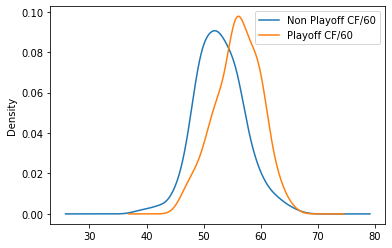

In [62]:
print(comparsions[['Non Playoff CF/60','Playoff CF/60']].plot.density())

AxesSubplot(0.125,0.125;0.775x0.755)


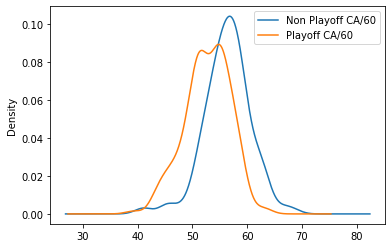

In [63]:
print(comparsions[['Non Playoff CA/60','Playoff CA/60']].plot.density())

Text(0, 0.5, 'Expected Goals For Per 60')

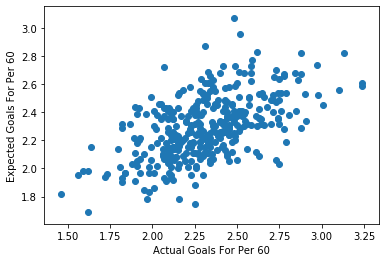

In [64]:
plt.scatter(df['GF/60'], df['xGF/60']),r2_score(df['GF/60'], df['xGF/60'])
plt.xlabel('Actual Goals For Per 60')
plt.ylabel('Expected Goals For Per 60')

Text(0, 0.5, 'Expected Goals Against Per 60')

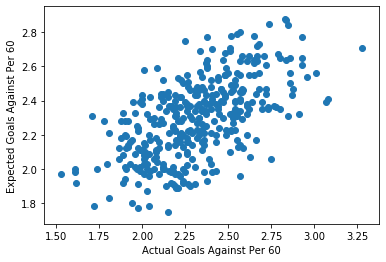

In [65]:
plt.scatter(df['GA/60'], df['xGA/60'])
plt.xlabel('Actual Goals Against Per 60')
plt.ylabel('Expected Goals Against Per 60')

In [66]:
from sklearn.metrics import r2_score
print("xGF vs GF R^2 value of: ",r2_score(df['GF/60'], df['xGF/60']))
print("xGA vs GA R^2 value of: ",r2_score(df['GA/60'], df['xGA/60']))

xGF vs GF R^2 value of:  0.2549807571187379
xGA vs GA R^2 value of:  0.29574411359007813


# Special Teams testing

In [67]:
teams.describe()

,PP%,PK%,SV%,S%,CF/60,CA/60,xGF/60,xGA/60
count,362.000000,362.000000,362.000000,362.000000,362.000000,362.000000,362.000000,362.000000
mean,18.542928,81.407818,0.908771,9.124309,54.454365,54.452956,2.293619,2.293895
std,2.938600,2.989266,0.008578,0.863841,4.378835,4.538903,0.222383,0.233183
min,10.040000,72.730000,0.885000,6.900000,39.140000,39.300000,1.690000,1.750000
25%,16.530000,79.702500,0.903000,8.500000,51.485000,51.470000,2.132500,2.120000
50%,18.345000,81.455000,0.909000,9.100000,54.815000,54.820000,2.295000,2.310000
75%,20.312500,83.395000,0.914000,9.600000,57.555000,57.480000,2.430000,2.447500
max,28.240000,89.580000,0.933000,12.200000,65.780000,68.530000,3.070000,2.880000


In [68]:
all_teams_with_avg_special_teams = teams.copy()
all_teams_with_avg_special_teams['Predicted Points'] =regressor.predict(all_teams_with_avg_special_teams[['PP%','PK%','SV%','S%','CF/60','CA/60','xGF/60','xGA/60']])
all_teams_with_avg_special_teams['Actual PP%'] = all_teams_with_avg_special_teams['PP%'] 
all_teams_with_avg_special_teams['Actual PK%'] = all_teams_with_avg_special_teams['PK%'] 
all_teams_with_avg_special_teams['PP%'] = 18.542928
all_teams_with_avg_special_teams['PK%'] = 81.407818
all_teams_with_avg_special_teams['AVG Special Teams Predicted'] =regressor.predict(all_teams_with_avg_special_teams[['PP%','PK%','SV%','S%','CF/60','CA/60','xGF/60','xGA/60']])
all_teams_with_avg_special_teams['Points Gained'] = all_teams_with_avg_special_teams['Predicted Points']-all_teams_with_avg_special_teams['AVG Special Teams Predicted']
all_teams_with_avg_special_teams = pd.concat([all_teams_with_avg_special_teams,df['Playoffs']],axis=1)
all_teams_with_avg_special_teams[['Team','Season','Actual PP%','Actual PK%','AVG Special Teams Predicted','Points Gained','Playoffs']].sort_values(by=['Points Gained'], ascending=False)

,Team,Season,Actual PP%,Actual PK%,AVG Special Teams Predicted,Points Gained,Playoffs
326,San Jose Sharks*,09-10,24.17,83.22,102.415042,8.674708,1
187,Chicago Blackhawks*,12-13,16.67,87.23,116.522750,7.532500,1
25,Tampa Bay Lightning*,18-19,28.24,85.02,115.934792,7.500958,1
120,Washington Capitals*,15-16,21.91,85.16,111.380917,5.922750,1
270,Vancouver Canucks*,11-12,24.32,85.58,109.835417,4.962208,1
301,Washington Capitals*,09-10,25.24,78.80,112.400917,4.692708,1
174,Pittsburgh Penguins*,13-14,23.38,85.04,100.938792,4.444333,1
206,St. Louis Blues*,12-13,19.46,84.67,92.601917,4.258083,1
204,Pittsburgh Penguins*,12-13,24.71,79.64,113.902625,4.161000,1
239,Vancouver Canucks*,11-12,19.79,86.01,103.948625,4.158333,1


In [69]:
all_teams_with_avg_special_teams[['Team','Season','Points Gained']].sort_values(by=['Points Gained']).head(5)

,Team,Season,Points Gained
69,Colorado Avalanche,16-17,-7.978250
254,Florida Panthers,11-12,-7.602958
112,Ottawa Senators,15-16,-7.453208
219,Columbus Blue Jackets,11-12,-7.194167
163,Florida Panthers,13-14,-6.486708


In [70]:
all_teams_with_avg_special_teams[['Team','Season','Points Gained']].sort_values(by=['Points Gained'],ascending=False).head(5)

,Team,Season,Points Gained
326,San Jose Sharks*,09-10,8.674708
187,Chicago Blackhawks*,12-13,7.532500
25,Tampa Bay Lightning*,18-19,7.500958
120,Washington Capitals*,15-16,5.922750
270,Vancouver Canucks*,11-12,4.962208
